In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
train=pd.read_csv("featured_train.csv")

In [3]:
test=pd.read_csv("featured_test.csv")

In [4]:
train.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,12.6,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,1,12.6,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,2,12.6,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,3,12.6,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,4,12.6,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [5]:
test.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,12.5,0,0.007565,13,107.8622,1999,1,0,1
1,1,12.5,1,0.038428,4,87.3198,2007,1,1,1
2,2,12.5,0,0.099575,11,241.7538,1998,1,2,0
3,3,12.5,0,0.015388,13,155.0340,2007,1,1,1
4,4,12.5,1,0.118599,4,234.2300,1985,1,2,3


In [6]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.6,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,12.6,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,12.6,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,12.6,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,12.6,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [8]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.5,0,0.007565,13,107.8622,1999,1,0,1
1,12.5,1,0.038428,4,87.3198,2007,1,1,1
2,12.5,0,0.099575,11,241.7538,1998,1,2,0
3,12.5,0,0.015388,13,155.0340,2007,1,1,1
4,12.5,1,0.118599,4,234.2300,1985,1,2,3


In [9]:
Test=pd.read_csv("Test.csv")

In [11]:
Test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


Model Building

In [12]:
# Spliting dataset

X=train.drop("Item_Outlet_Sales",axis=1)
y=train["Item_Outlet_Sales"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#import modules

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

Linear Regression

In [15]:
li_model = linear_model.LinearRegression()
li_model.fit(X_train, y_train)
y_pred =li_model.predict(X_test)

In [18]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Absolute Error: 855.877235219949
Mean Squared Error: 1292694.0060378204
Root Mean Squared Error: 1136.9670206465182
r2_score: 0.5243899033638213


In [19]:
li_result=pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
li_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,1097.237683
2957,356.8688,598.806104
7031,377.5086,1056.399467
1084,5778.4782,4235.969415
856,2356.9320,2759.651714
4304,865.5400,841.540480
2132,4613.9940,4583.333842
1385,2410.8618,2810.869473
5239,1948.1308,2117.446108
6516,1937.4780,3522.708720


<AxesSubplot: >

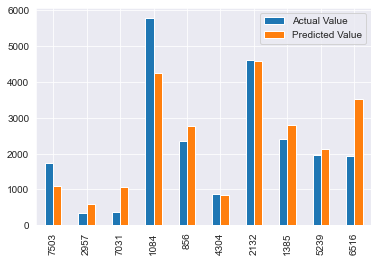

In [20]:
li_graph = li_result.head(10)
li_graph.plot(kind="bar")

KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [22]:
from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 score:",r2_score(y_test,y_pred))

Mean Absolute Error: 965.2372356387096
Mean Squared Error: 1699096.3623309294
Root Mean Squared Error: 1303.4939057513577
r2 score: 0.37486568259159214


In [23]:
knn_result=pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
knn_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,1405.783436
2957,356.8688,637.476868
7031,377.5086,562.414576
1084,5778.4782,3218.996524
856,2356.9320,3079.737796
4304,865.5400,526.847540
2132,4613.9940,3527.461664
1385,2410.8618,2197.539480
5239,1948.1308,1622.368176
6516,1937.4780,2909.785688


<AxesSubplot: >

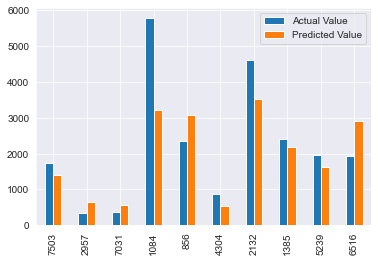

In [24]:
knn_graph = knn_result.head(10)
knn_graph.plot(kind="bar")

Random Forest

In [25]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_model = RandomForestRegressor(n_estimators = 200, random_state = 0)
  
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)


In [26]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean Absolute Error: 751.44330274956
Mean Squared Error: 1163624.7913479533
Root Mean Squared Error: 1078.7144160286139
r2_score: 0.5718772602980093


In [27]:
rf_result=pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
rf_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,821.477356
2957,356.8688,762.437541
7031,377.5086,640.882435
1084,5778.4782,4557.584095
856,2356.9320,2249.005820
4304,865.5400,427.423626
2132,4613.9940,5484.667318
1385,2410.8618,1591.222052
5239,1948.1308,1403.709469
6516,1937.4780,2711.720175


<AxesSubplot: >

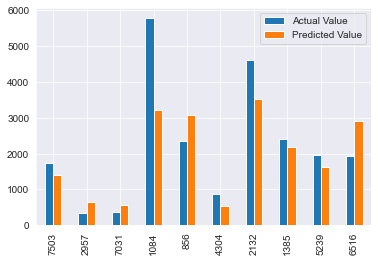

In [28]:
rf_graph = knn_result.head(10)
rf_graph.plot(kind="bar")

Decision Tree

In [29]:
dt_model=DecisionTreeRegressor() 
dt_model.fit(X_train,y_train)

y_pred=dt_model.predict(X_test)


In [30]:
print("end=Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

end=Mean Absolute Error: 1015.6050720234604
Mean Squared Error: 2138091.2112395884
Root Mean Squared Error: 1462.2213277201192
r2_score: 0.21334997853709126


In [31]:
dt_result=pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_pred})
rf_result.head(10)

,Actual Value,Predicted Value
7503,1743.0644,821.477356
2957,356.8688,762.437541
7031,377.5086,640.882435
1084,5778.4782,4557.584095
856,2356.9320,2249.005820
4304,865.5400,427.423626
2132,4613.9940,5484.667318
1385,2410.8618,1591.222052
5239,1948.1308,1403.709469
6516,1937.4780,2711.720175


<AxesSubplot: >

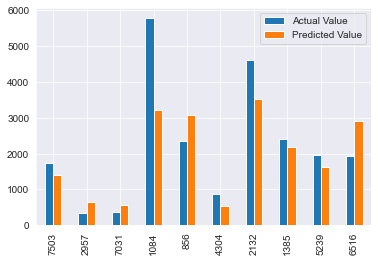

In [32]:
rf_graph = knn_result.head(10)
rf_graph.plot(kind="bar")

Applying model in test dataset

In [33]:
predictions = rf_model.predict(test)

In [34]:
# creating csv

output = pd.DataFrame({"Item_Identifier": Test["Item_Identifier"], "Outlet_Identifier":Test["Outlet_Identifier"], "Item_Outlet_Sales":predictions})
output.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


pickle File

In [35]:
import pickle
pickle.dump(rf_model, open("pickle.pkl","wb"))
model = pickle.load(open("pickle.pkl","rb"))